In [29]:
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from random import sample
import os
import matplotlib.image as mpimg 

#package interne 
import indicator_viz

import matplotlib.lines as mlines

class Viz():
    
    #Classe permettant de visualiser de facon assez rapide une base assez propre mais comportant encore des NaN/0
    
    print("convertissez vos donnees en csv svp")
    print("")
    print("Il faut avoir indicator_viz dans le meme dossier")
    print("")
    print("Exemple : Test = Viz(df, 'fichier_ou_on_enregistre)")
    print("Test.lafonction(arguments)")
    print("")
    print("apercu() pour avoir un resume complet de la base")
    print("")
    print("warn_col() pour connaitre les colonnes a fort taux de NaN ou de 0")
    print("")
    print("Corr pour avoir la heatmap des correlations")
    print("")
    print("rentrer data, eventuellement changer taille_echantillon (taille du sample)")
    print("")
    print("une erreur est renvoyee si la taille du sample est > taille de la base")
        
    def __init__(self, data, taille_echantillon=1000):
        
        self.data = data
        self.taille_echantillon = taille_echantillon
        self.data_sample = self.data.sample(self.taille_echantillon)
    
    #rapide resume de la base
    
    def apercu(self):
        
        l_int = []
        l_str = []
        l_float = []
        
        for i in self.data_sample.columns:
            if self.data_sample[i].dtype == 'float64':
                l_float.append(i)
                
        for i in self.data_sample.columns:
            if self.data[i].dtype == 'object':
                    l_str.append(i)
                    
        for i in self.data_sample.columns:
            if self.data[i].dtype == 'int64':
                 l_int.append(i)
        
        print('nombre de type float : ' + str(len(l_int)))
        print('nombre de type object : ' + str(len(l_str)))
        print('nombre de type int : ' + str(len(l_float)))
        print("-"*246)
        print("les dimensions")
        print("nombre de lignes :" + str(self.data.shape[0]) + "nombre de colonnes :" + str(self.data.shape[1]))
        print("-"*246)
        print("un tableau recapitulatif : ATTENTION --> sur un sample de 1000 !")
        return(indicator_viz.indicator(self.data_sample))
           
    
    #la matrice des correlations
    
    def corr_matrix(self):
        return  self.data_sample.corr()
        
    #pour savoir quelles colonnes sont remplies de nan ou de 0    
    
    def warn_col(self):
    
        #renvoie les colonnes a fort taux de NaN ou de 0
        
        #on prend un seuil de 200 nan 
        #(soit on prend la un sample de la table de taille mille soit la table fait moins de 1000lignes)
    
        lnan_ou_0=[]
        
        for i in self.data.columns:
            s_nan=0
            s_0=0
            l=len(self.data[i])
            
            if l < 1000:
                for j in self.data[i]:
                    if pd.isnull(j):
                        s_nan += 1
                    elif j == 0:
                        s_0 +=1
                if s_nan > 200:
                    lnan_ou_0.append(i)
                elif s_0 > 200 :
                    lnan_ou_0.append(i)
                
            else :
                extrait = self.data[i].sample(1000)
                for j in extrait:
                    if pd.isnull(j):
                        s_nan += 1
                    elif j == 0 :
                        s_0 += 1
                if s_nan > 200:
                    lnan_ou_0.append(i)
                elif s_0 > 200 :
                    lnan_ou_0.append(i)
        print("voici la liste des colonnes a plus de 20% de NaN ou de 0")
        return(lnan_ou_0)          
    
    def Corr(self):
        #pour plot
        plt.figure(figsize=(12,10), dpi= 80)
        sns.heatmap(self.data.corr(), xticklabels=self.data.corr().columns, yticklabels=self.data.corr().columns, cmap='RdYlGn', center=0, annot=True)

        #deco
        plt.title('Heatmap des correlations', fontsize=22)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()
   
    def Evolution_2_annees(self,df1,df2, etablissements, colonne_a_visualiser):
        
        print("Attention on a remplace NaN par 0 !")
        
        ###################################################################
        ##### Creation de la nouvelle base pour tracer les evolutions #####
        ###################################################################

        #df1 = pd.read_csv("Prelevements_2016.csv", sep=";", encoding = 'latin-1')
        #df2 = pd.read_csv("Prelevements_2017.csv", sep=";", encoding = 'latin-1')

        Annee_1 = df1["Annee"][0]
        Annee_2 = df2["Annee"][0]
    
        df1.rename(columns={colonne_a_visualiser: colonne_a_visualiser + str(Annee_1) }, inplace=True)
        df2.rename(columns={colonne_a_visualiser: colonne_a_visualiser + str(Annee_2) }, inplace=True)
        
        #y_max = max(df1[colonne_a_visualiser + str(Annee_1)], df2[colonne_a_visualiser + str(Annee_2)])

        new_df = df1.merge(df2, left_on=['Identifiant'], right_on=['Identifiant'])
        new_def_no_nan = new_df.fillna(0)

        ###########################################################
        ##### Debut du code de la future fonction en lui meme #####
        ###########################################################

        # importation des data
        df = new_def_no_nan[new_def_no_nan[colonne_a_visualiser + str(Annee_1)] != 0]
        df = df[df[colonne_a_visualiser + str(Annee_2)] != 0]
        df['is_in'] = df.Nom_Etablissement_x.apply(lambda x: x in etablissements)
        df = df[df.is_in == True]

        left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.Nom_Etablissement_x, df[colonne_a_visualiser + str(Annee_1)])]
        right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(df.Nom_Etablissement_x, df[colonne_a_visualiser + str(Annee_2)])]
        klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(df[colonne_a_visualiser + str(Annee_1)], df[colonne_a_visualiser + str(Annee_2)])]

        # tracer les lignes
        def newline(p1, p2, color='black'):
            ax = plt.gca()
            l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
            ax.add_line(l)
            return l

        fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

        # lignes verticales
        ax.vlines(x=1, ymin=0, ymax=1000000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        ax.vlines(x=3, ymin=0, ymax=1000000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

        # points
        ax.scatter(y=df[colonne_a_visualiser + str(Annee_1)], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.7)
        ax.scatter(y=df[colonne_a_visualiser + str(Annee_2)], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.7)

        # annotations sur les lignes
        for p1, p2, c in zip(df[colonne_a_visualiser + str(Annee_1)], df[colonne_a_visualiser + str(Annee_2)], df['Nom_Etablissement_x']):
            newline([1,p1], [3,p2])
            ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
            ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

        # deco
        ax.set_title("evolution entre " + str(Annee_1)+  " et " + str(Annee_2), fontdict={'size':22})
        ax.set_xticks([1,3])
        ax.set_xticklabels([colonne_a_visualiser + str(Annee_1), colonne_a_visualiser + str(Annee_2)])
        plt.yticks(np.arange(0, 1000000, 200000), fontsize=12)

        # Pour enlever les bords
        plt.gca().spines["top"].set_alpha(.0)
        plt.gca().spines["bottom"].set_alpha(.0)
        plt.gca().spines["right"].set_alpha(.0)
        plt.gca().spines["left"].set_alpha(.0)
        plt.show()

convertissez vos donnees en csv svp

Il faut avoir indicator_viz dans le meme dossier

Exemple : Test = Viz(df, 'fichier_ou_on_enregistre)
Test.lafonction(arguments)

apercu() pour avoir un resume complet de la base

warn_col() pour connaitre les colonnes a fort taux de NaN ou de 0

Corr pour avoir la heatmap des correlations

rentrer data, eventuellement changer taille_echantillon (taille du sample)

une erreur est renvoyee si la taille du sample est > taille de la base


In [30]:
df = pd.read_csv("Prelevements.csv", sep=";", encoding = 'latin-1')

In [31]:
Test = Viz(df)

In [32]:
Test.apercu()

nombre de type float : 1
nombre de type object : 1
nombre de type int : 5
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
les dimensions
nombre de lignes :2119nombre de colonnes :7
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
un tableau recapitulatif : ATTENTION --> sur un sample de 1000 !


,Variable,Type,Taux_NA,Nb_unique,occ_et_val_princi,Moyenne,Variance,Min,Max
0,Identifiant,float64,0.000,1000,"[(90.00322, 1), (55.013830000000006, 1), (52.0...",6.715017e+05,3.922408e+13,32.00097,77559405.0
1,Nom_Etablissement,object,0.000,974,"[(CHARIER CM, 4), (COOPERL ARC ATLANTIQUE, 3),...",NaN,NaN,NaN,NaN
2,Annee,int64,0.000,1,"[(2016, 1000)]",2.016000e+03,0.000000e+00,2016.00000,2016.0
3,Prelevements_eaux_souterraines,float64,0.511,419,"[(104000.0, 5), (140000.0, 4), (56300.0, 3)]",9.790226e+05,1.654478e+13,35.00000,53100000.0
4,Prelevements_eaux_surface,float64,0.735,242,"[(150000.0, 2), (244000.0, 2), (69300.0, 2)]",5.697957e+06,1.378413e+15,16.00000,574000000.0
5,Prelevements_reseau_distribution,float64,0.221,615,"[(101000.0, 9), (185000.0, 7), (5720.0, 4)]",1.561140e+05,7.237126e+11,14.00000,17000000.0
6,Prelevements_mer,float64,0.991,9,"[(43900000.0, 1), (153000000.0, 1), (10200000....",5.943523e+07,8.425585e+15,77200.00000,268000000.0


In [33]:
Test.warn_col()

voici la liste des colonnes a plus de 20% de NaN ou de 0


['Prelevements_eaux_souterraines',
 'Prelevements_eaux_surface',
 'Prelevements_reseau_distribution',
 'Prelevements_mer']

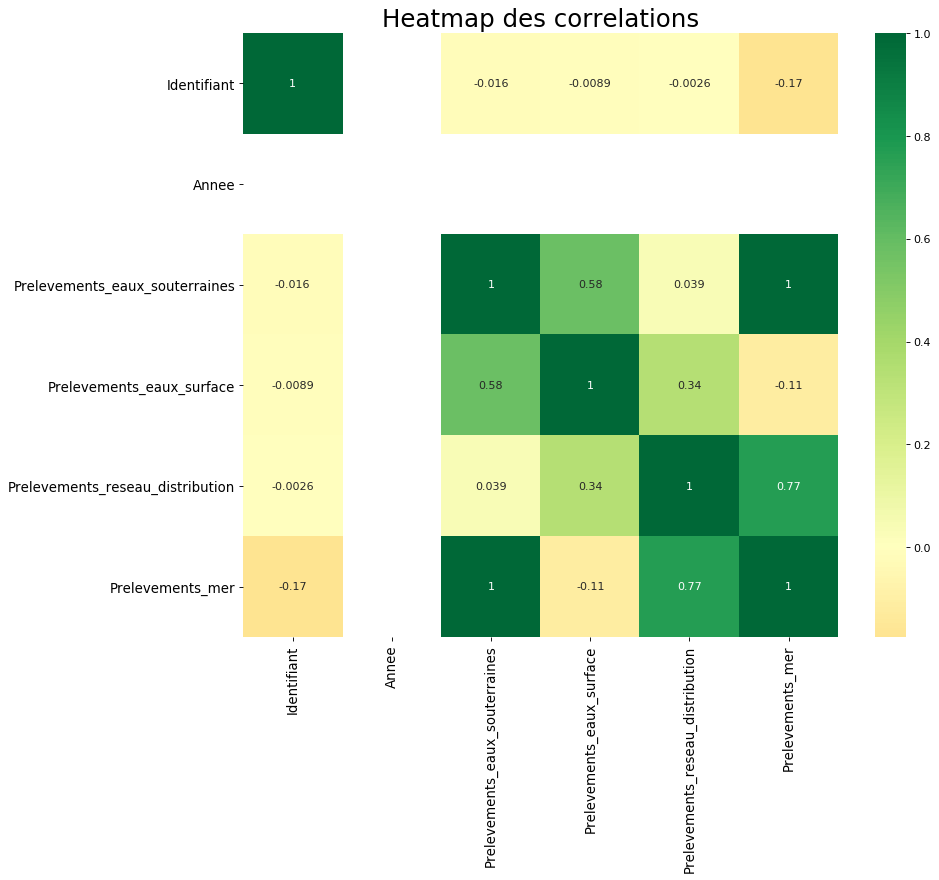

In [34]:
Test.Corr()

In [36]:
df1 = pd.read_csv("Prelevements_2016.csv", sep=";", encoding = 'latin-1')
df2 = pd.read_csv("Prelevements_2017.csv", sep=";", encoding = 'latin-1')

#Annee_1 = df1["Annee"][0]
#Annee_2 = df2["Annee"][0]

#df1.rename(columns={'Prelevements_eaux_souterraines': 'Prelevements_eaux_souterraines' + str(Annee_1) ,'Prelevements_eaux_surface': 'Prelevements_eaux_surface' + str(Annee_1),'Prelevements_reseau_distribution': 'Prelevements_reseau_distribution' + str(Annee_1), 'Prelevements__mer': 'Prelevements__mer' + str(Annee_1)}, inplace=True)
#df2.rename(columns={'Prelevements_eaux_souterraines': 'Prelevements_eaux_souterraines' + str(Annee_2) ,'Prelevements_eaux_surface': 'Prelevements_eaux_surface' + str(Annee_2),'Prelevements_reseau_distribution': 'Prelevements_reseau_distribution' + str(Annee_2), 'Prelevements__mer': 'Prelevements__mer' + str(Annee_2)}, inplace=True)


In [37]:
df1.head()

,Identifiant,Nom_Etablissement,Annee,Prelevements_eaux_souterraines,Prelevements_eaux_surface,Prelevements_reseau_distribution,Prelevements_mer
0,55.04408,CELTYS,2016,141000.0,NaN,2610.0,NaN
1,100.00220,SEALED AIR,2016,52000.0,NaN,55800.0,NaN
2,60.00305,COMPAGNE MADRANGE,2016,8170.0,NaN,125000.0,NaN
3,549.00588,CHARAL,2016,19200.0,NaN,190000.0,NaN
4,65.01121,RoutiÃ¨re de l'Est Parisien (ISDND de Claye So...,2016,50800.0,NaN,5720.0,NaN


Attention on a remplace NaN par 0 !


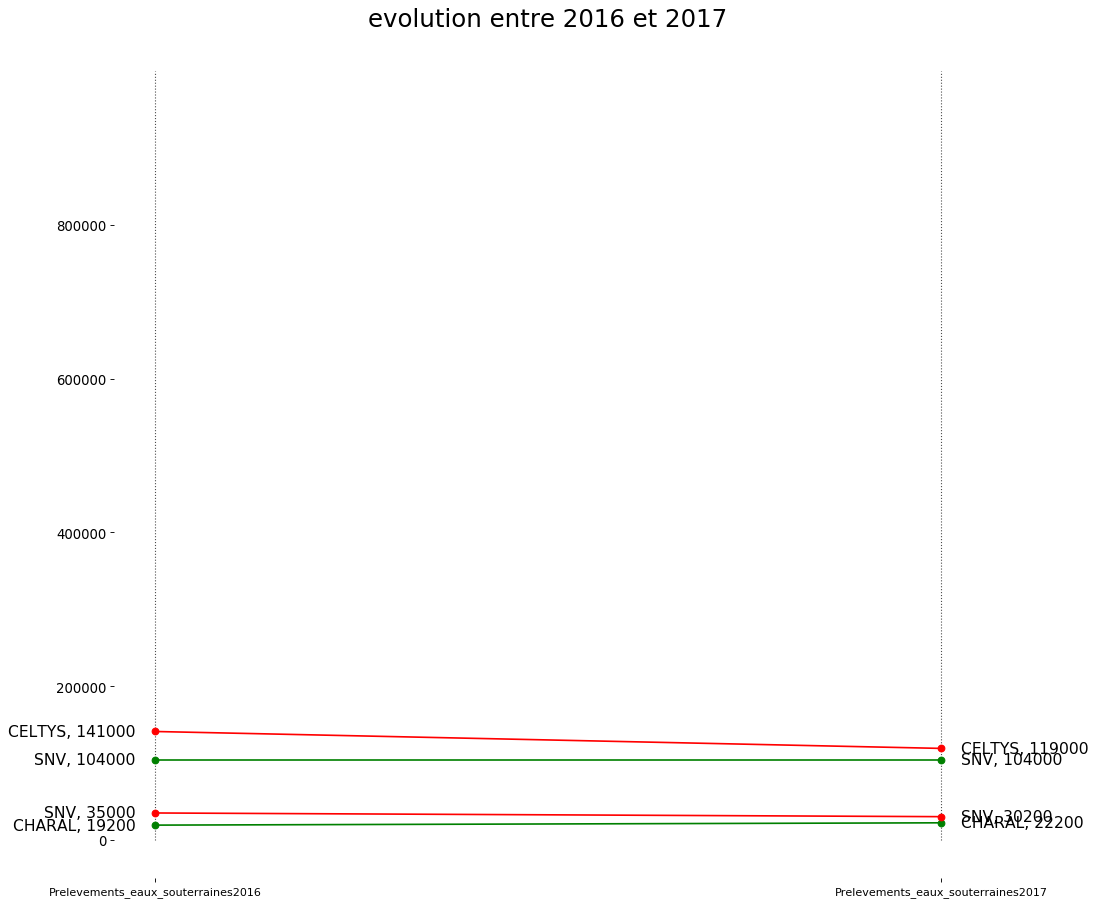

In [41]:
Test.Evolution_2_annees(df1,df2, ["CELTYS", "CHARAL","SNV"], 'Prelevements_eaux_souterraines')

#Probleme si je prends "ARKEMA" dans la liste par exemple, l'echelle n'est pas adaptee 